In [1]:
import cv2
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(12, 9)

In [2]:
equirectangular_image = cv2.imread("C:/Users/paulo/Pictures/equirectangular.jpg", cv2.IMREAD_COLOR)

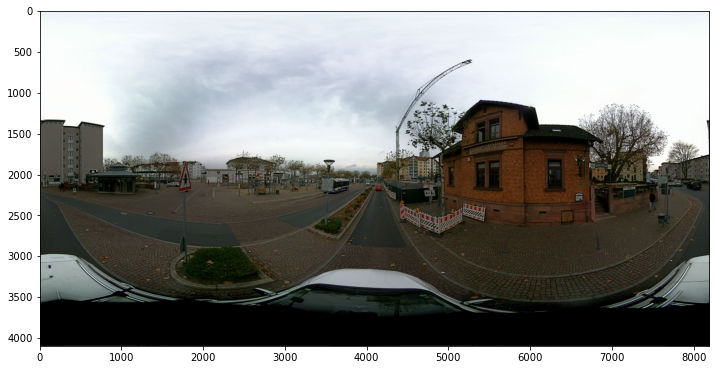

In [3]:
plt.imshow(cv2.cvtColor(equirectangular_image, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
eq_h, eq_w, _ =  equirectangular_image.shape

eq_cx = eq_w // 2.0
eq_cy = eq_h // 2.0

They should be equal

In [5]:
delta = 180/eq_h
#delta_w = eq_w/360

In [6]:
print(f'{delta} degrees per pixel')

0.0439453125 degrees per pixel


In [7]:
phi = 45
theta = 180



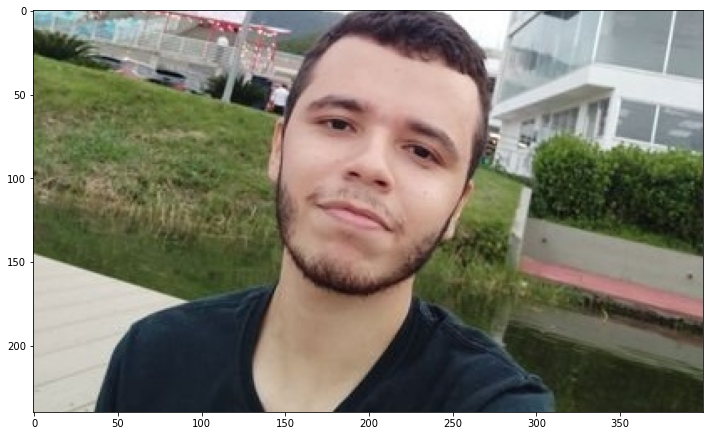

In [8]:
face_image = cv2.imread("C:/Users/paulo/Pictures/Profile/cropped.jpg", cv2.IMREAD_COLOR)

plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))
plt.show()


In [9]:
face_image.shape

(240, 400, 3)

In [10]:
#assuming that the height of the image projected is 1

r_h = 0.5
r_w = (face_image.shape[1]/face_image.shape[0])*r_h

In [11]:
for y in range(eq_h):
    for x in range(eq_w):
        
        dx = (x - eq_cx)*delta - theta
        dy = (y - eq_cy)*delta - phi
        
        #if abs(dx) <= 180:
        if True:
        
            tanx = np.tan(dx*np.pi/180) + r_w/2
            tany = np.tan(dy*np.pi/180) + r_h/2
            
            #tanx = np.sin(dx*np.pi/180) + r_w/2
            #tany = np.cos(dy*np.pi/180) + r_h/2
            
            if tanx >= 0 and tanx <= r_w and tany>=0 and tany<=r_h:
                
                posx = int((tanx/r_w) * face_image.shape[1])
                posy = int((tany/r_h) * face_image.shape[0])
                
                if posx >=0 and posx < face_image.shape[1] and posy >= 0 and posy <= face_image.shape[0]:                
                    equirectangular_image[y,x] = face_image[posy, posx]

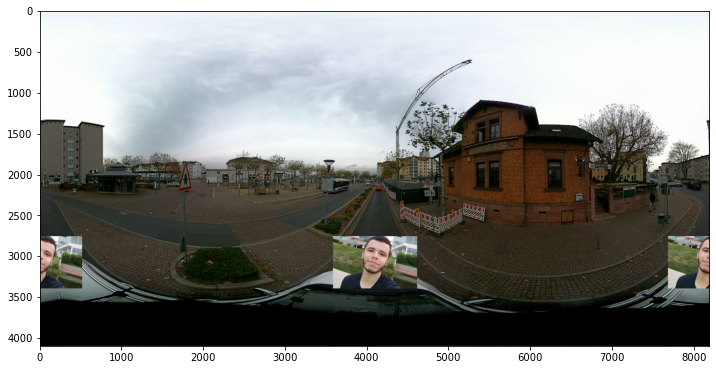

In [12]:
plt.imshow(cv2.cvtColor(equirectangular_image, cv2.COLOR_BGR2RGB))
plt.show()